# Centro de un Contorno con OpenCV Python

Ref: https://robologs.net/2019/06/24/buscar-el-centro-de-un-contorno-con-opencv-python/

## Instalar librerias (solo la primera vez)
* [Numpy](https://pypi.org/project/numpy/)
* [Opencv](https://pypi.org/project/opencv-python/)
* [Matplotlib](https://pypi.org/project/matplotlib/)

In [ ]:
!pip3 install --upgrade pip

In [ ]:
!pip3 install matplotlib numpy opencv-python 

## Cargar imagen

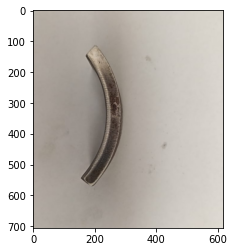

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
 
#Cargamos una fuente de texto
font = cv2.FONT_HERSHEY_SIMPLEX

#Abrimos la imagen
imagen = cv2.imread("../img/photo_14.png")
if(imagen is None):
    print("Error: no se ha podido encontrar la imagen")
    quit()

# OpenCV by default reads images in BGR format
imagen_original = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

plt.imshow(imagen_original)
plt.show()

Tutorial de [segmentación](https://realpython.com/python-opencv-color-spaces/).

## Ver distribucion de colores RGB en 3D (opcional)

In [ ]:
! pip install --upgrade matplotlib

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors

def plot3dColor (imagen):
    r, g, b = cv2.split(imagen)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    pixel_colors = imagen.reshape((np.shape(imagen)[0]*np.shape(imagen)[1], 3))
    norm = colors.Normalize(vmin=-1.,vmax=1.)
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    plt.show()

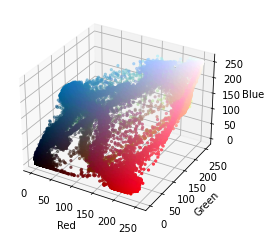

In [14]:
plot3dColor(imagen)

## Cambiar de espacio color RGB a HSV

HSV significa tono, saturación y valor (o brillo) , y es un espacio de color cilíndrico. Los colores, o matices, se modelan como una dimensión angular que gira alrededor de un eje vertical central, que representa el canal de valor. Los valores van de oscuro (0 en la parte inferior) a claro en la parte superior. El tercer eje, la saturación, define los tonos de tono desde el menos saturado, en el eje vertical, hasta el más saturado, más alejado del centro

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSuynUEJIzuGQ4Qi07GvRLpMuK_kinSC1tyMQ&usqp=CAU)

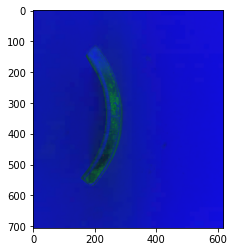

In [31]:
hsv_imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_imagen)
plt.show()

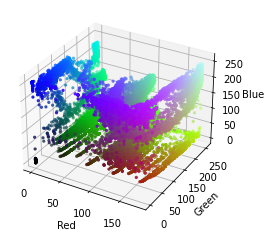

In [16]:
plot3dColor(hsv_imagen)

In [3]:
run filter.py # ESC para cerrar


Pulsa 'ESC' para salir



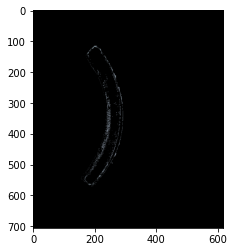

In [45]:
# Calculamos la mascara
#Establecemos el rango mínimo y máximo de (Blue, Green, Red):
hMin = 9
hMax = 34
sMin = 38
sMax = 44
vMin = 74
vMax = 172

color_bajos=np.array([hMin,sMin,vMin])
color_altos=np.array([hMax,sMax,vMax])

mascara = cv2.inRange(hsv_imagen, color_bajos, color_altos)

resultado = cv2.bitwise_and(imagen, imagen, mask=mascara)
plt.imshow(resultado, cmap='gray')
plt.show()

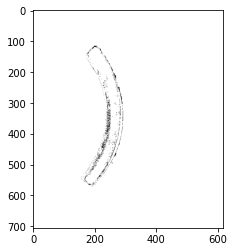

In [46]:
#Invertimos la mascara para obtener las bolas
mascara_inv = cv2.bitwise_not(mascara) 
plt.imshow(mascara_inv, cmap='gray')
plt.show()

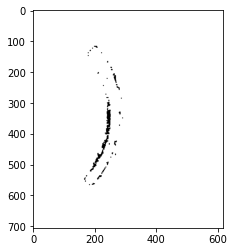

In [47]:
#Eliminamos ruido
kernel = np.ones((3,3),np.uint8)
mascara_inv = cv2.morphologyEx(mascara_inv,cv2.MORPH_OPEN,kernel)
mascara_inv = cv2.morphologyEx(mascara_inv,cv2.MORPH_CLOSE,kernel)
plt.imshow(mascara_inv, cmap='gray')
plt.show()

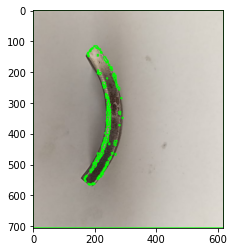

In [48]:
#Buscamos los contornos de las bolas y los dibujamos en verde
contours,_ = cv2.findContours(mascara_inv, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(imagen_original, contours, -1, (0,255,0), 2)
plt.imshow(imagen_original)
plt.show()

In [1]:
#Buscamos el centro de las bolas y lo pintamos en rojo
for i in contours:
    #Calcular el centro a partir de los momentos
    momentos = cv2.moments(i)
    cx = int(momentos['m10']/momentos['m00'])
    cy = int(momentos['m01']/momentos['m00'])
 
    #Dibujar el centro
    cv2.circle(imagen_original,(cx, cy), 3, (0,0,255), -1)
 
    #Escribimos las coordenadas del centro
    cv2.putText(imagen_original,"(x: " + str(cx) + ", y: " + str(cy) + ")",(cx+10,cy+10), font, 0.5,(255,255,255),1)

TypeError: 'int' object is not iterable

In [50]:
#Mostramos la imagen final
cv2.imshow('Final', imagen_original)
  
#Salir con ESC
while(1):
    tecla = cv2.waitKey(5) & 0xFF
    if tecla == 27:
        break
 
#Destruir la ventana y salir
cv2.destroyAllWindows()
quit()